cd /mnt/c/Users/mksch/Desktop/Personal/GitHub/basegis
docker run -p 8888:8888 -p 8787:8787 -v $(pwd):/home/gisuser/code/ -it basegis

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
print(os.getcwd())             # Shows current working directory

/home/gisuser/code


In [31]:
print(os.listdir('/home/gisuser/code/data'))     # Lists files in /data, adjust path accordingly

['combined_interval', 'combined_rc_interval', 'combined_rc_timeseries', 'combined_timeseries', 'img_diff', 'mw_area', 'mw_edge', 'mw_pn', 'old_remap_new_combine', 'remap_interval', 'remap_timeseries', 'trend', 'typology_TimeInterval.xlsx']


In [32]:
#Load your data from Excel
# Replace 'your_file.xlsx' with the actual filename
# Replace 'Time_Segment' with the actual column name that contains "TS", "90-95", etc.
# orginal data: '/home/gisuser/code/code/data/typology_grapgh_data.xlsx'
df = pd.read_excel('/home/gisuser/code/data/typology_TimeInterval.xlsx', index_col=0)
# if 'TS_km2' in df.columns:
#     df = df.drop(columns=['TS_km2'])

In [33]:
print(df)
#print(df.index.tolist())


                      90-95_km2  95-00_km2  00-05_km2  05-10_km2  10-15_km2  \
Typology                                                                      
Attrition                101952     101596      92443      80002      80253   
Aggregation               59820      61683      67701      70966      69170   
Shrinkage                 82898      81503      83194      79629      79416   
Perforation               21525      20946      21429      22661      24823   
Deformation                4178       4351       4704       4853       4957   
Persistent                63161      64870      67961      72865      68919   
Enlargement              113229     122636     133823     147226     146886   
Dissection                59153      57373      57137      57032      64733   
Fragmentation per se       1616       1641       1827       1952       2110   
Creation                  87525      90544     106143     125385     135002   

                      15-20_km2  
Typology         

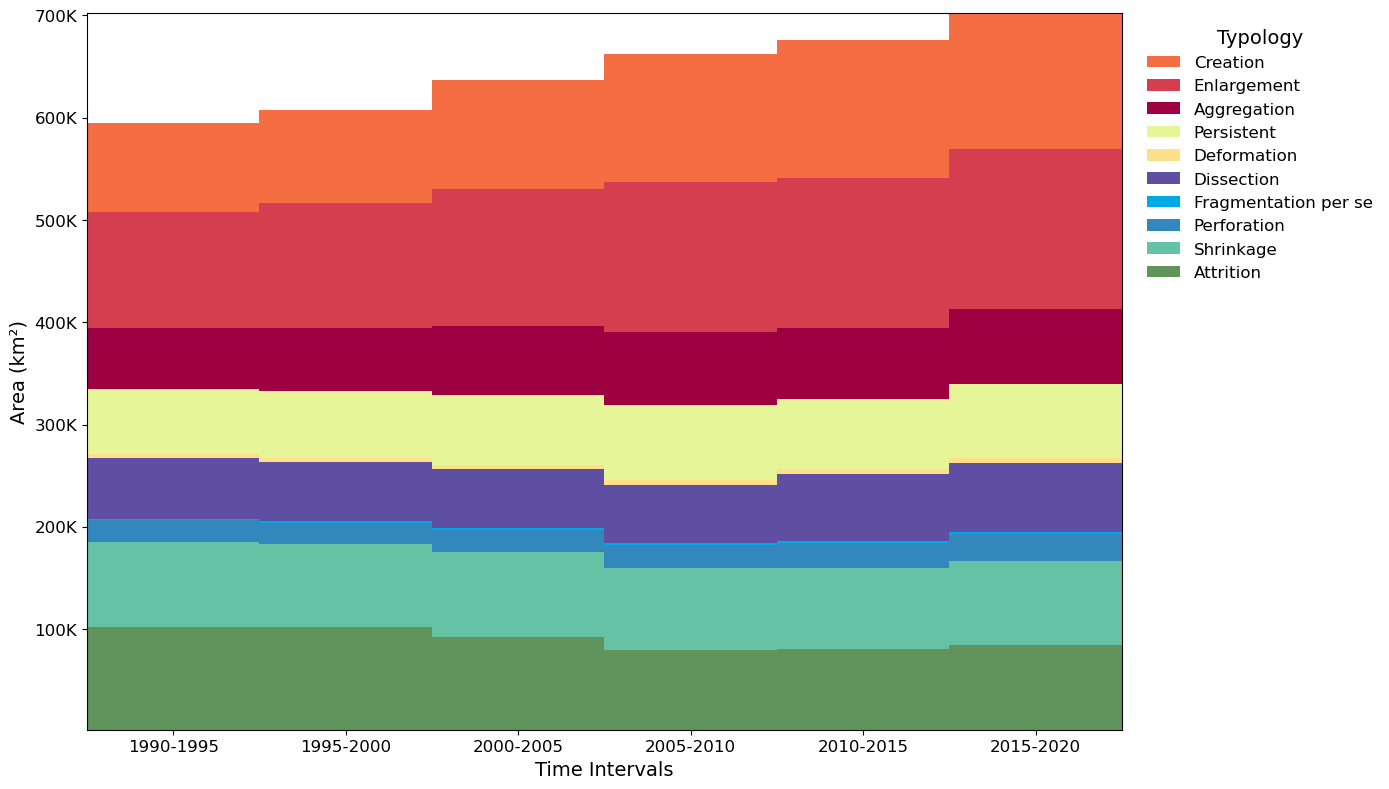

In [34]:
colors = {
    "Aggregation": "#9E0142",
    "Attrition": "#61945A",
    "Creation": "#F46D43",
    "Dissection": "#5E4FA2",
    "Fragmentation per se": "#00A9E6",
    "Shrinkage": "#66C2A5",
    "Perforation": "#3288BD",
    "Enlargement": "#D53E4F",
    #"shift": "#E6F598",
    "Persistent": "#E6F598",
    "Deformation": "#FEE08B"
}

# legend_labels = {
#     "Aggregation": "Aggregation",
#     "Attrition": "Attrition",
#     "Creation": "Creation",
#     "Dissection": "Dissection",
#     "Fragmentation per se": "Fragmentation per se",
#     "Shrinkage": "Shrinkage",
#     "Perforation": "Perforation",
#     "Enlargement": "Enlargement",
#     "Persistent": "Shift",
#     "Deformation": "Deformation"
# }

typology_order = [
    "Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection",
    "Deformation", "Persistent", 
    "Aggregation", "Enlargement", "Creation", 
    
]

time_points = df.columns.tolist()

custom_x_labels = [
    "1990-1995", "1995-2000", "2000-2005",
    "2005-2010", "2010-2015", "2015-2020"
]

fig, ax = plt.subplots(figsize=(14, 8))

bottom = [0] * len(time_points)
for typ in typology_order:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(
            range(len(time_points)),
            data,
            bottom=bottom,
            color=colors.get(typ, "#cccccc"),
            edgecolor='none',
            width=1.0,
            #label=legend_labels.get(typ, typ)
            label=typ
        )
        bottom = [bottom[i] + data.iloc[i] for i in range(len(data))]

ax.set_xlabel('Time Intervals', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(df.values.min(), df.sum().max())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
#ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0)
# Create legend in typology_order



ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


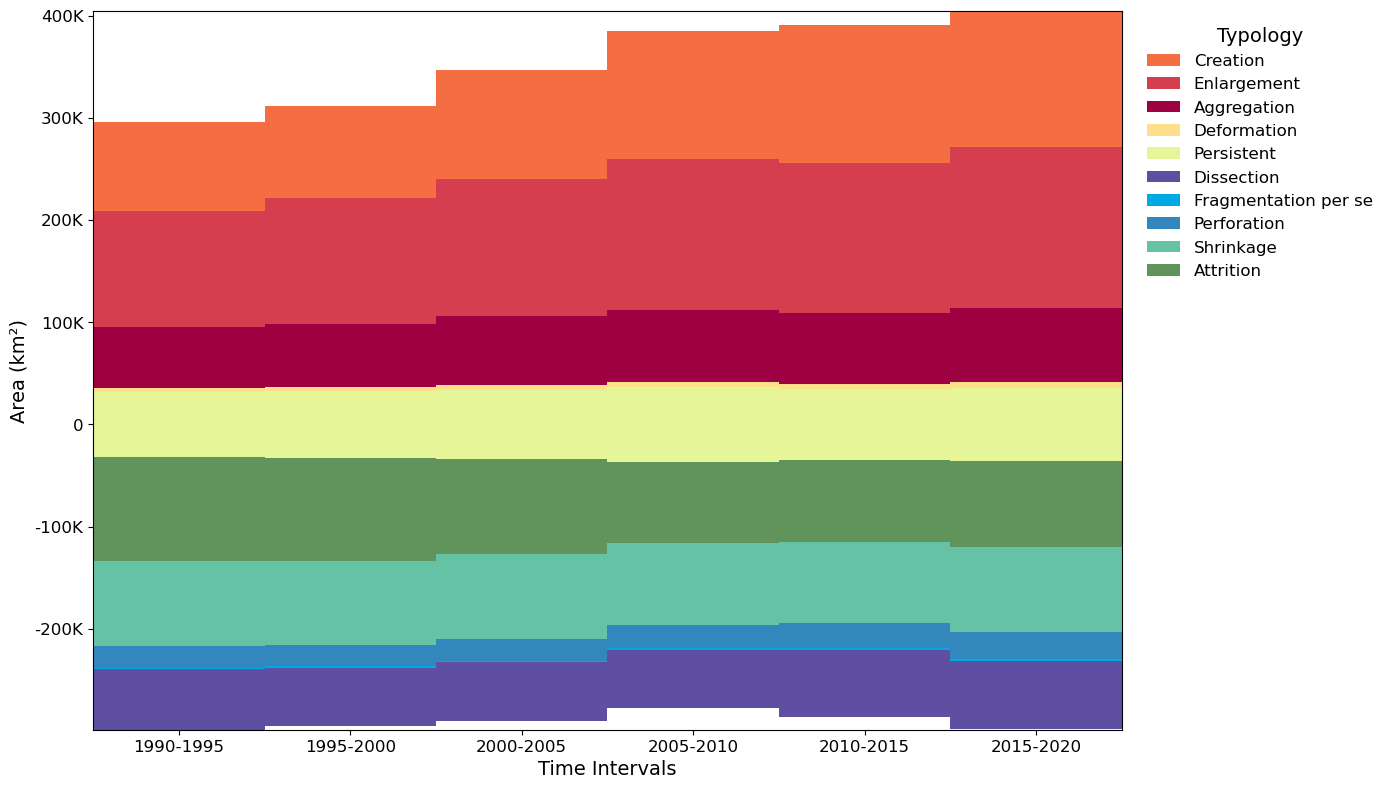

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming df is your DataFrame and colors dict is defined as you shared

# Define typology groups
baseline_typology = "Persistent"
decreasing = ["Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection"]
increasing = ["Deformation", "Aggregation", "Enlargement", "Creation"]

time_points = df.columns.tolist()

fig, ax = plt.subplots(figsize=(14, 8))

persistent_data = df.loc[baseline_typology]
half_persistent = persistent_data / 2

persistent_color = colors.get(baseline_typology, "#E6F598")

# Plot lower half Persistent below zero (no legend label to avoid duplication)
ax.bar(range(len(time_points)), -half_persistent, color=persistent_color, width=1.0, label='_nolegend_')

# Plot decreasing typologies stacked below the lower half baseline
bottom_neg = (-half_persistent).tolist()
for typ in decreasing:
    if typ in df.index:
        data = df.loc[typ] * -1  # Negate to plot below zero
        ax.bar(range(len(time_points)), data, bottom=bottom_neg, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_neg = [bottom_neg[i] + data.iloc[i] for i in range(len(data))]

# Plot upper half Persistent above zero (with legend label)
ax.bar(range(len(time_points)), half_persistent, color=persistent_color, width=1.0, label=baseline_typology)

# Plot increasing typologies stacked above upper half
bottom_pos = half_persistent.tolist()
for typ in increasing:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom_pos, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_pos = [bottom_pos[i] + data.iloc[i] for i in range(len(data))]

# Customize axes and labels
ax.set_xlabel('Time Intervals', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(min(bottom_neg), max(bottom_pos))

# Custom y-axis formatter to show '0' instead of '0K'
def custom_formatter(x, pos):
    if x == 0:
        return "0"
    return f"{x/1000:.0f}K"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0)

# Legend settings as before
ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()


/tmp/ipykernel_24/1140385656.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom = [bottom[i] + data[i] for i in range(len(data))]


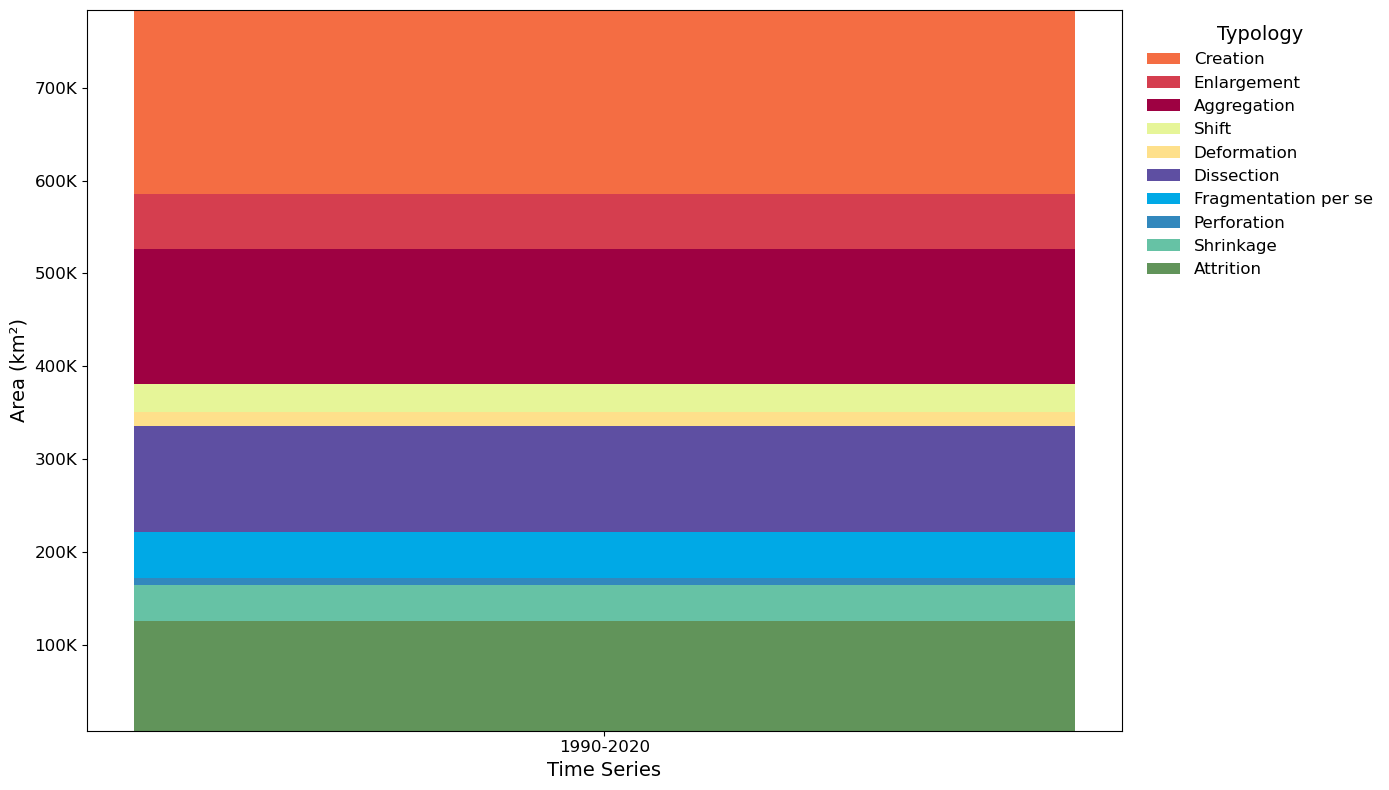

In [88]:
# time series 
df = pd.read_excel('/home/gisuser/code/code/data/typology_grapgh_data.xlsx', index_col=0)
if 'TS_km2' in df.columns:
    df = df[['TS_km2']]
    
colors = {
    "aggregation": "#9E0142",
    "attrition": "#61945A",
    "creation": "#F46D43",
    "dissection": "#5E4FA2",
    "frag per se": "#00A9E6",
    "shrinkage": "#66C2A5",
    "perforation": "#3288BD",
    "enlargement": "#D53E4F",
    "shift": "#E6F598",
    "deformation": "#FEE08B"
}

legend_labels = {
    "aggregation": "Aggregation",
    "attrition": "Attrition",
    "creation": "Creation",
    "dissection": "Dissection",
    "frag per se": "Fragmentation per se",
    "shrinkage": "Shrinkage",
    "perforation": "Perforation",
    "enlargement": "Enlargement",
    "shift": "Shift",
    "deformation": "Deformation"
}

typology_order = [
    "attrition", "shrinkage", "perforation", "frag per se", "dissection",
    "deformation", "shift", 
    "aggregation", "enlargement", "creation", 
    
]

time_points = df.columns.tolist()

custom_x_labels = [
    "1990-2020"
]

fig, ax = plt.subplots(figsize=(14, 8))

bottom = [0] * len(time_points)
for typ in typology_order:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(
            range(len(time_points)),
            data,
            bottom=bottom,
            color=colors.get(typ, "#cccccc"),
            edgecolor='none',
            width=1.0,
            label=legend_labels.get(typ, typ)
        )
        bottom = [bottom[i] + data[i] for i in range(len(data))]

ax.set_xlabel('Time Series', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(df.values.min(), df.sum().max())
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
#ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0.05, y=0.05)
# Create legend in typology_order



ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', reverse=True, frameon=False, fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


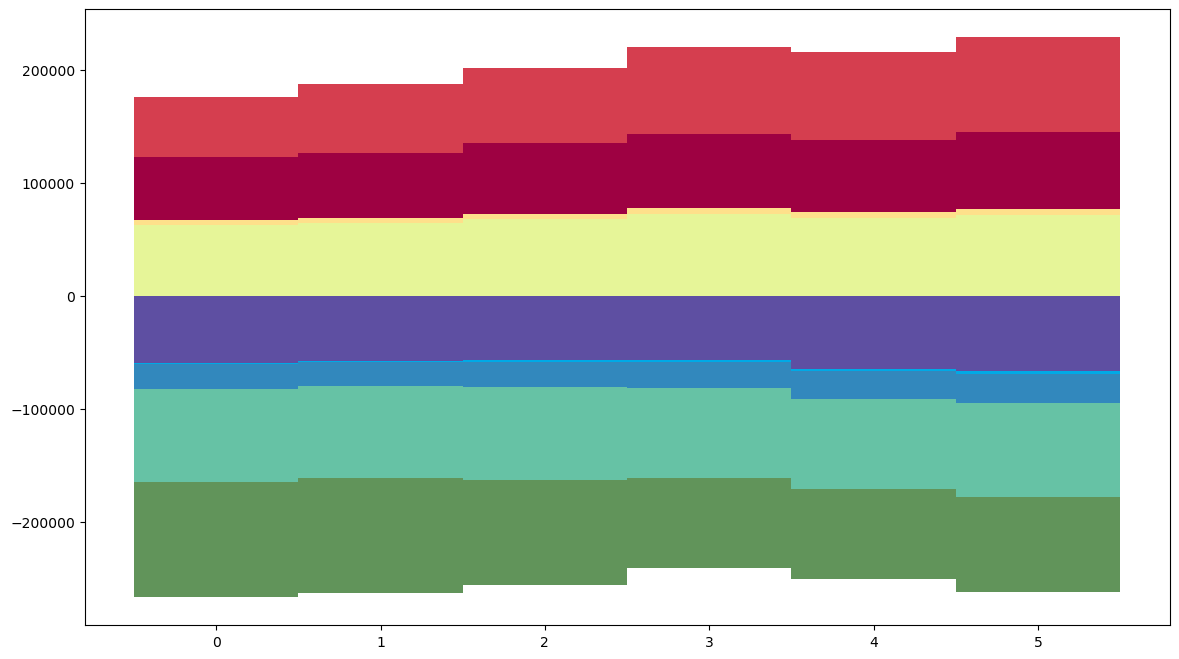

In [38]:
# test 1 like aiyins

# Define typology groups
decreasing = ["Dissection", "Fragmentation per se", "Perforation", "Shrinkage", "Attrition"]
increasing = ["Creation", "Enlargement", "Aggregation", "Deformation"]
baseline = "Persistent"

# Prepare data by multiplying decreasing typologies by -1
df_neg = df.loc[decreasing] * -1
df_pos = df.loc[increasing]
df_base = df.loc[baseline]

# Initialize figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

time_points = df.columns.tolist()

# Plot baseline (Persistent) at zero
ax.bar(range(len(time_points)), df_base, color=colors.get(baseline, "#cccccc"), width=1.0, label=baseline)

# Plot decreasing typologies stacked below zero
bottom_neg = [0] * len(time_points)
for typ in decreasing:
    if typ in df.index:
        data = df_neg.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom_neg, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_neg = [bottom_neg[i] + data.iloc[i] for i in range(len(data))]

# Plot increasing typologies stacked above zero + baseline
bottom_pos = df_base.values.tolist()
for typ in increasing:
    if typ in df.index:
        data = df_pos.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom_pos, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)


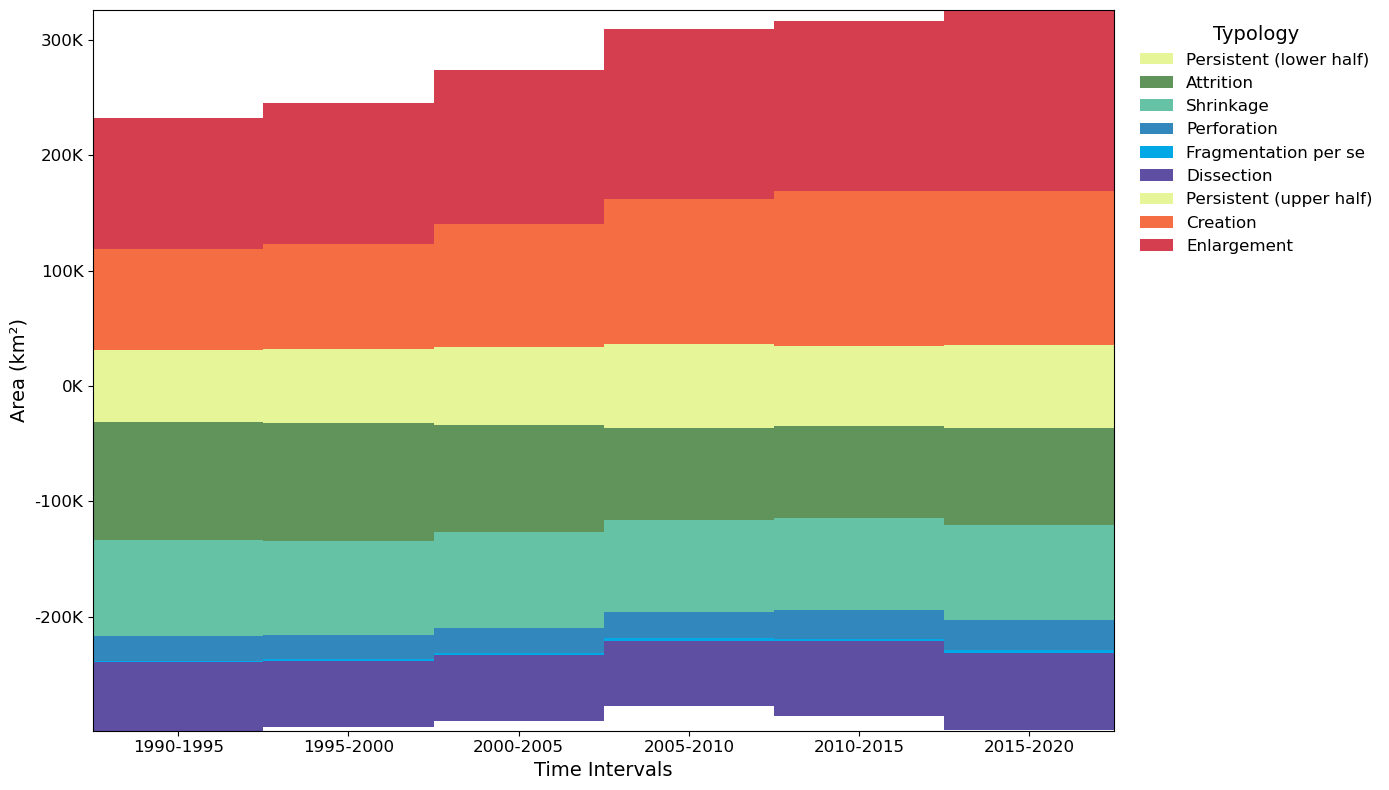

In [41]:
# getting persisnet to be at 0

baseline_typology = "Persistent"
decreasing = ["Attrition", "Shrinkage", "Perforation", "Fragmentation per se", "Dissection"]
increasing = ["Creation", "Enlargement"]

time_points = df.columns.tolist()
fig, ax = plt.subplots(figsize=(14, 8))

persistent_data = df.loc[baseline_typology]
half_persistent = persistent_data / 2

# Plot lower half Persistent below zero
ax.bar(range(len(time_points)), -half_persistent, color=colors.get(baseline_typology, "#cccccc"), width=1.0, label=baseline_typology + " (lower half)")

# Plot decreasing typologies stacked below the lower half baseline
bottom_neg = (-half_persistent).tolist()
for typ in decreasing:
    if typ in df.index:
        data = df.loc[typ] * -1
        ax.bar(range(len(time_points)), data, bottom=bottom_neg, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_neg = [bottom_neg[i] + data.iloc[i] for i in range(len(data))]

# Plot upper half Persistent above zero
ax.bar(range(len(time_points)), half_persistent, color=colors.get(baseline_typology, "#cccccc"), width=1.0, label=baseline_typology + " (upper half)")

# Plot increasing typologies stacked above upper half
bottom_pos = half_persistent.tolist()
for typ in increasing:
    if typ in df.index:
        data = df.loc[typ]
        ax.bar(range(len(time_points)), data, bottom=bottom_pos, color=colors.get(typ, "#cccccc"), width=1.0, label=typ)
        bottom_pos = [bottom_pos[i] + data.iloc[i] for i in range(len(data))]

# Axis, labels, legend, etc.
ax.set_xlabel('Time Intervals', fontsize=14)
ax.set_ylabel('Area (km²)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(min(bottom_neg), max(bottom_pos))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))
ax.set_xticks(range(len(time_points)))
ax.set_xticklabels(custom_x_labels[:len(time_points)])
ax.margins(x=0)
ax.legend(title='Typology', bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False, fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()
